In [1]:
from models import Models
from Data_preprocessing import split_60 ,split_train_val_test ,load_data
from utils import save_data, split_train_test ,plot_scatter_bpm ,plot_loss ,calculate_loss_bpm
from sklearn.preprocessing import MinMaxScaler


import pandas as pd


from tensorflow.keras.models import save_model

from keras.optimizers import RMSprop ,Adam ,SGD ,Adagrad
import json
import os

import tensorflow as tf
tf.random.set_seed(1234)

2023-06-13 20:35:01.948345: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 20:35:02.112544: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-12.1/lib64:
2023-06-13 20:35:02.112562: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-13 20:35:02.137875: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-13 20:35:02.72

In [2]:
model_name = 'model2_bpm'
NUM_EPOCH = 1

# lr = 5e-4
# optimizer = RMSprop(learning_rate=lr)
# loss = "mse"

In [3]:
df , ratio = load_data()
df

(5439, 1813, 1813)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,hr,calculated_hr,DBP,SBP
0,0.022165,0.008058,-0.005694,-0.018277,-0.028401,-0.034445,-0.034832,-0.028548,-0.015653,0.002471,...,0.006408,-0.014542,-0.033742,-0.049071,-0.058827,-0.061907,70,99.23,75,111
1,0.002396,-0.001148,-0.004544,-0.007492,-0.009561,-0.010251,-0.009101,-0.005841,-0.000541,0.006277,...,0.023915,0.031500,0.035881,0.036621,0.033664,0.027309,85,86.31,86,133
2,-0.007708,-0.005857,-0.004098,-0.002622,-0.001656,-0.001300,-0.001325,-0.001099,0.000269,0.003553,...,-0.055547,-0.063149,-0.066136,-0.062301,-0.050670,-0.031967,59,57.83,87,139
3,-0.010544,-0.005010,0.000461,0.005682,0.010287,0.013727,0.015341,0.014503,0.010822,0.004327,...,-0.027160,-0.043717,-0.057046,-0.066155,-0.070509,-0.070022,86,68.22,80,146
4,-0.007411,-0.007268,-0.007012,-0.006467,-0.005435,-0.003734,-0.001218,0.002173,0.006360,0.011074,...,-0.023944,-0.009014,0.006739,0.022151,0.036009,0.047166,85,72.06,80,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9060,0.028062,0.013806,-0.000827,-0.014660,-0.026783,-0.036512,-0.043327,-0.046852,-0.046867,-0.043359,...,-0.031265,-0.024912,-0.017063,-0.008171,0.001152,0.010138,82,82.40,79,133
9061,0.054225,0.071998,0.084893,0.091340,0.090327,0.081546,0.065480,0.043417,0.017377,-0.010103,...,0.020310,0.008572,-0.002583,-0.012376,-0.020267,-0.026010,86,77.07,80,146
9062,0.045568,0.033181,0.017340,-0.000325,-0.017933,-0.033597,-0.045684,-0.052995,-0.054832,-0.050976,...,0.068069,0.077176,0.078598,0.072051,0.058184,0.038529,93,90.76,81,118
9063,-0.108834,-0.099573,-0.085189,-0.067508,-0.048111,-0.028148,-0.008312,0.011064,0.029816,0.047741,...,-0.067566,-0.058927,-0.048947,-0.037186,-0.023145,-0.006584,68,69.99,84,148


In [4]:
df_input = df.drop(['DBP','SBP','hr','calculated_hr'], axis=1)
df_target = df[['DBP','SBP']]


scaler = MinMaxScaler()
scaled_df_target = scaler.fit_transform(df_target)
print(df_input.shape)
print(scaled_df_target.shape)

df_target = scaled_df_target
        
X_train, y_train, X_val, y_val, X_test, y_test = split_train_test(df_input ,df_target ,ratio)
    

(9065, 60)
(9065, 2)


In [5]:
models = Models()
model = models.import_model("model2_bpm")
model.summary()

2023-06-13 20:35:04.984901: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-13 20:35:04.984926: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (atamach01): /proc/driver/nvidia/version does not exist
2023-06-13 20:35:04.986597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 60, 240)          173760    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 60, 240)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 120)              144480    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 2)                 2

57/57 [==============================] - 3s 37ms/step
DBP-MAE: 6.516214003565557
SBP-MAE: 13.937598058550119
DBP-MSE: 71.70976175615428
SBP-MSE: 291.14164047116486
57/57 [==============================] - 4s 37ms/step
DBP-MAE: 3571.9839417699022
SBP-MAE: 9219.753511061672
DBP-MSE: 12895693.366868092
SBP-MSE: 86472944.1599492
57/57 [==============================] - 4s 41ms/step
DBP-MAE: 164399.47244725592
SBP-MAE: 673207.6845410658
DBP-MSE: 27303852417.85132
SBP-MSE: 460824336422.8912
57/57 [==============================] - 3s 38ms/step
DBP-MAE: 7401554.637600263
SBP-MAE: 48480176.50555932
DBP-MSE: 55343259548576.77
SBP-MSE: 2389807560806823.0
57/57 [==============================] - 3s 38ms/step
DBP-MAE: 333073508.72670245
SBP-MAE: 3490581879.288343
DBP-MSE: 1.1207246542247926e+17
SBP-MSE: 1.2388826418561307e+19
57/57 [==============================] - 3s 38ms/step
DBP-MAE: 14988311445.640478
SBP-MAE: 251321904472.29962
DBP-MSE: 2.269468489858948e+20
SBP-MSE: 6.422368075981429e+22
57

/home/jayasanka/Projects/nervotech test/HR_estimator_redesign/utils.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6))


57/57 [==============================] - 3s 37ms/step
DBP-MAE: 1.244594260284514e+20
SBP-MAE: 3.5012677285421527e+22
DBP-MSE: 1.5648558117031181e+40
SBP-MSE: 1.2464795266927641e+45
57/57 [==============================] - 3s 37ms/step
DBP-MAE: 5.600674171280313e+21
SBP-MAE: 2.52091276455035e+24
DBP-MSE: 3.168833018698814e+43
SBP-MSE: 6.46174986637529e+48
57/57 [==============================] - 4s 39ms/step
DBP-MAE: 2.5203033770761404e+23
SBP-MAE: 1.8150571904762513e+26
DBP-MSE: 6.416886862865098e+46
SBP-MSE: 3.34977113072895e+52
57/57 [==============================] - 3s 37ms/step
DBP-MAE: 1.1341365196842633e+25
SBP-MAE: 1.3068411771429012e+28
DBP-MSE: 1.2994195897301823e+50
SBP-MSE: 1.736521354169888e+56
57/57 [==============================] - 3s 37ms/step
DBP-MAE: 5.103614338579185e+26
SBP-MAE: 9.409256475428888e+29
DBP-MSE: 2.6313246692036185e+53
SBP-MSE: 9.0021267000167e+59
57/57 [==============================] - 4s 43ms/step
DBP-MAE: 2.2966264523606333e+28
SBP-MAE: 6.774664662

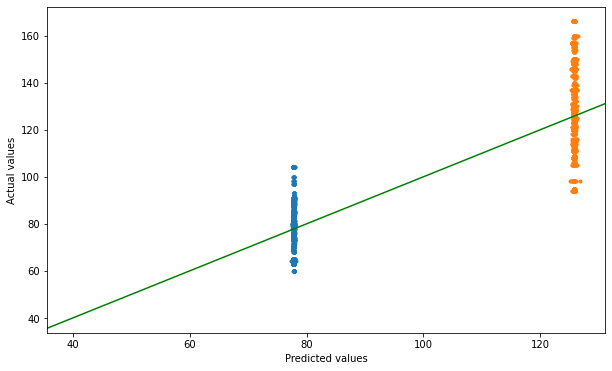

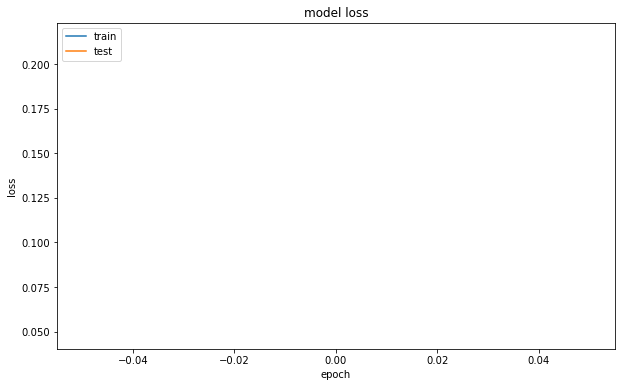

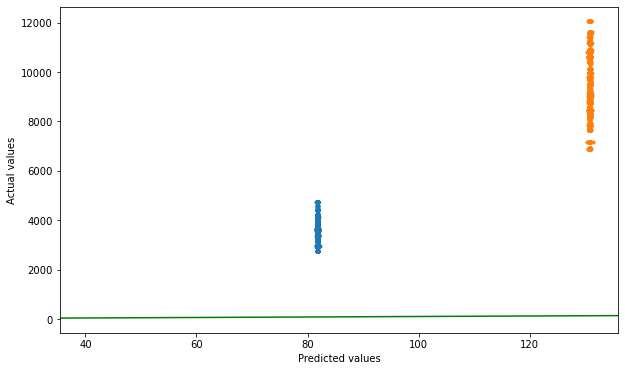

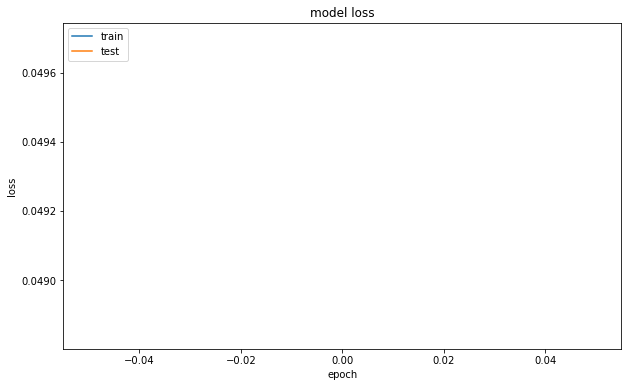

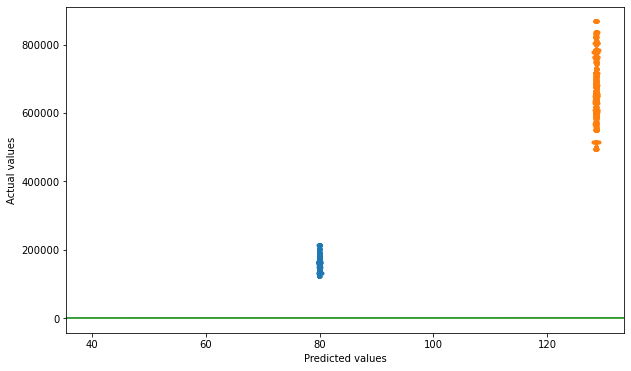

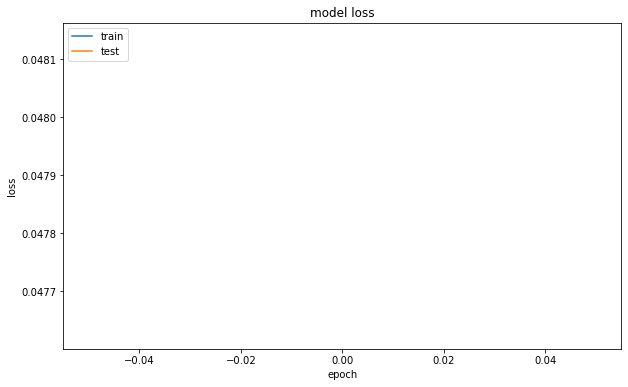

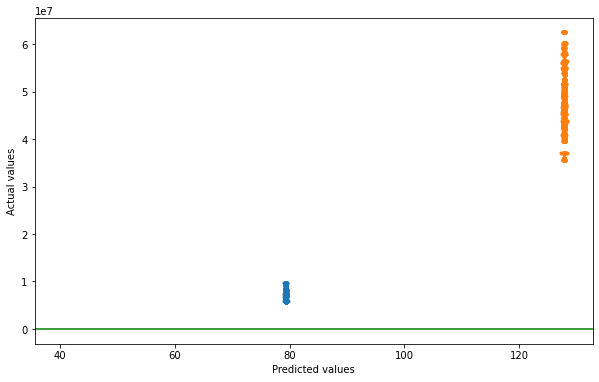

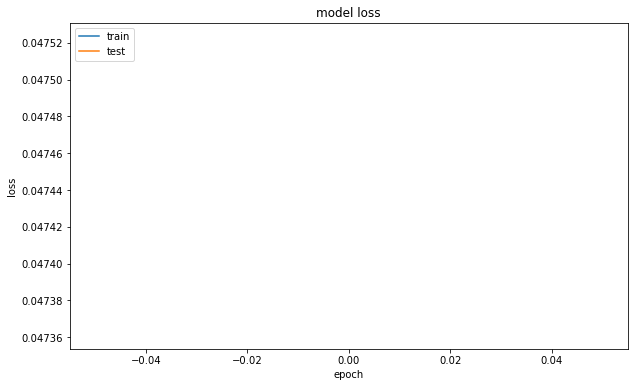

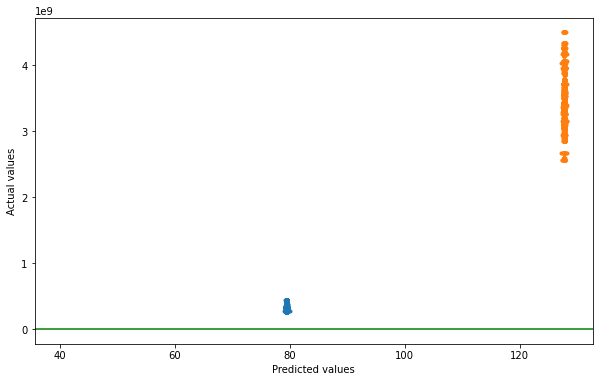

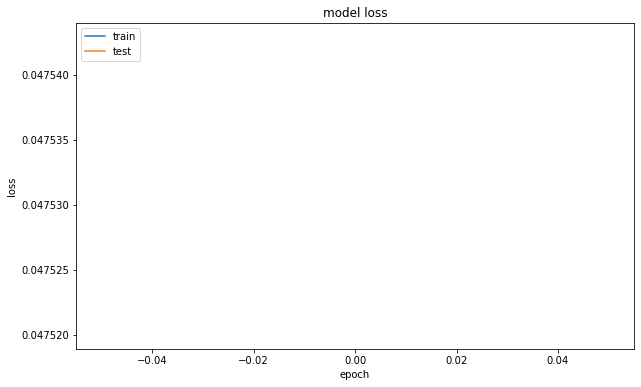

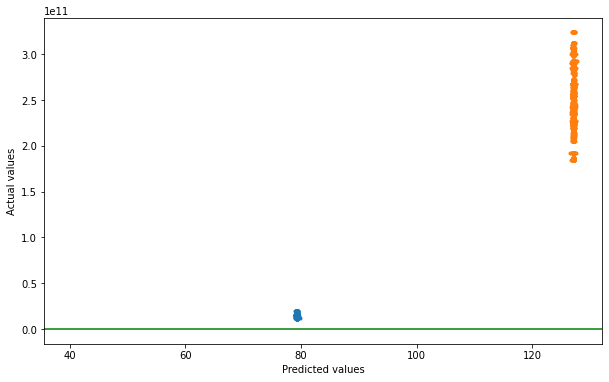

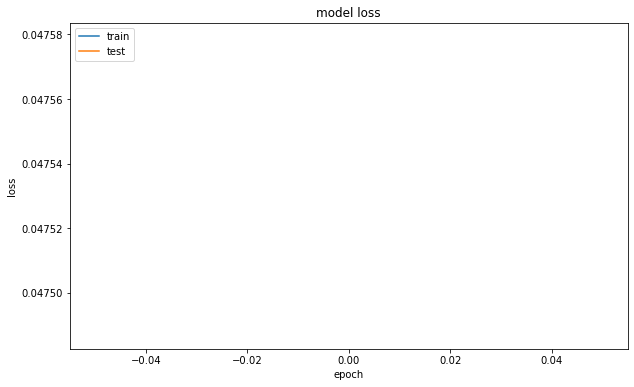

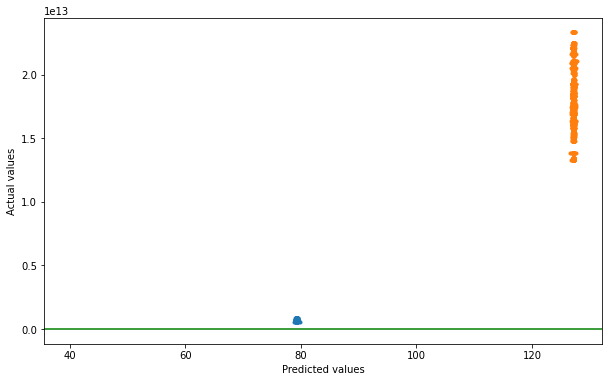

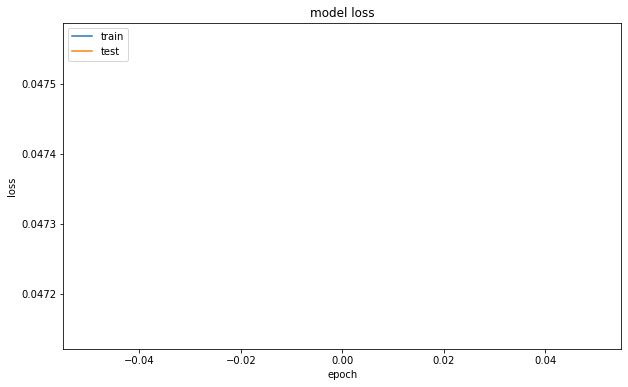

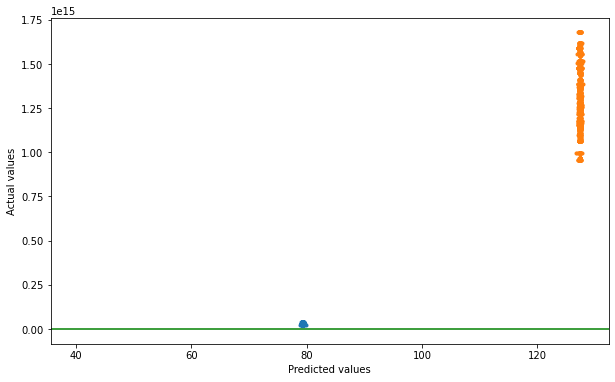

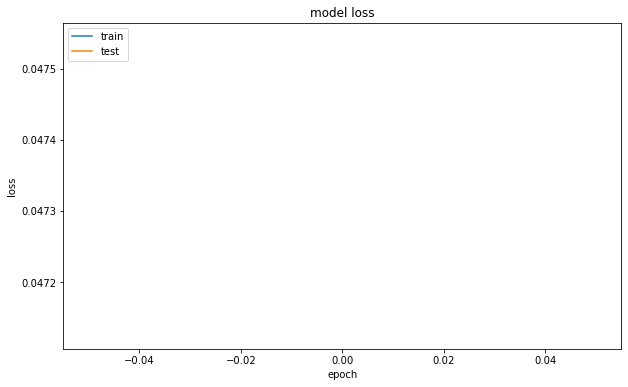

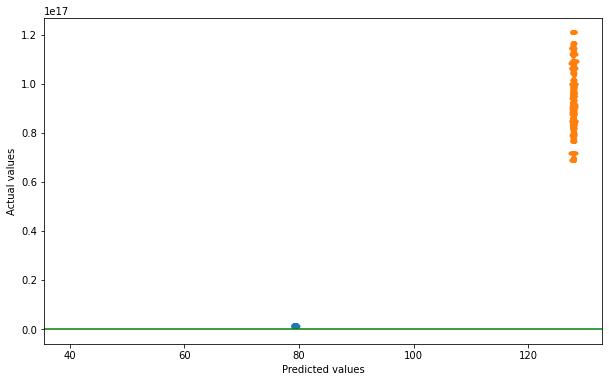

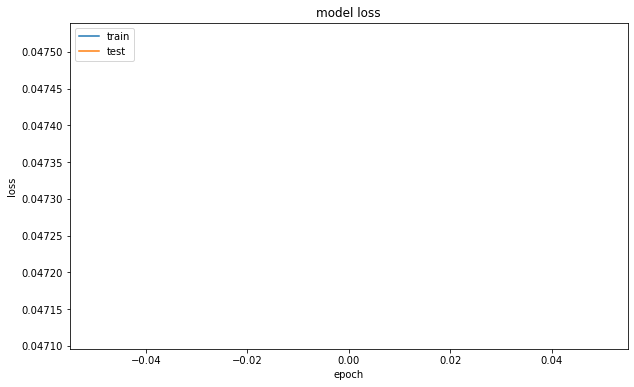

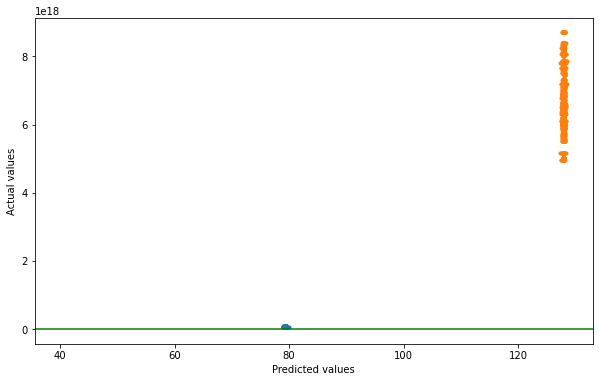

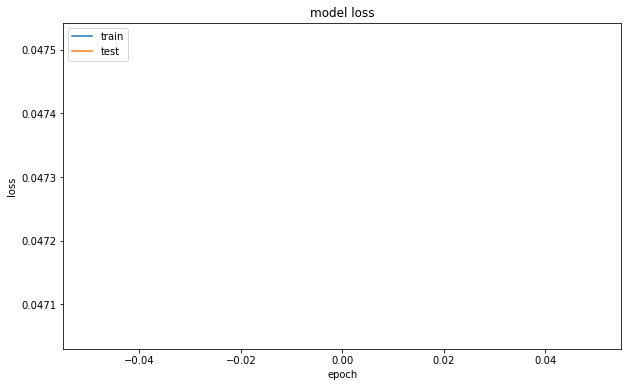

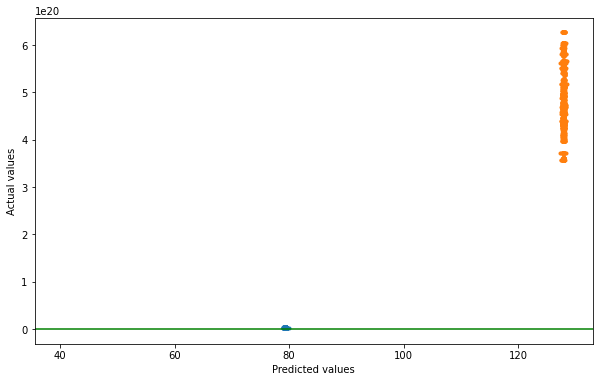

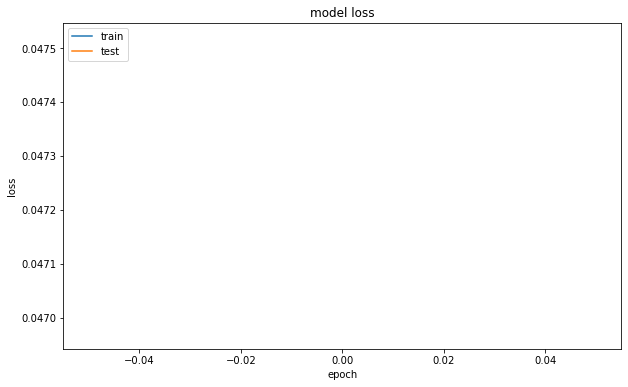

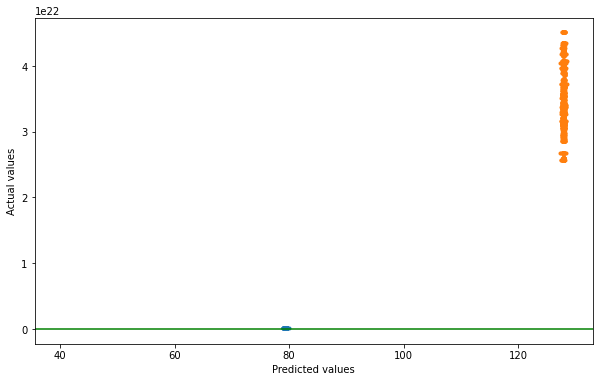

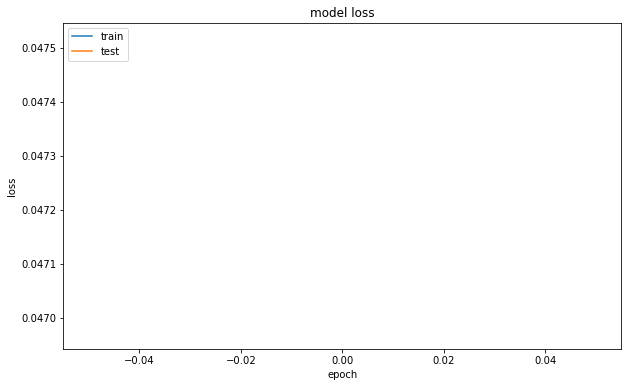

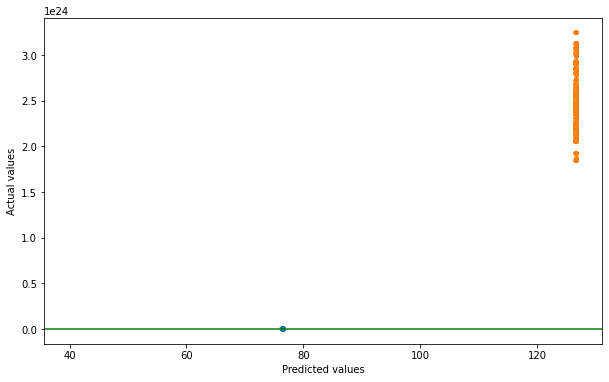

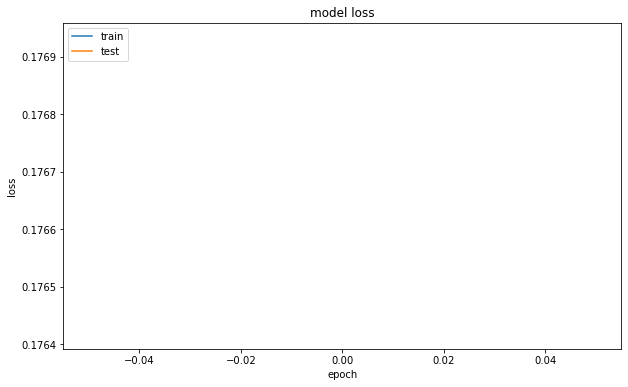

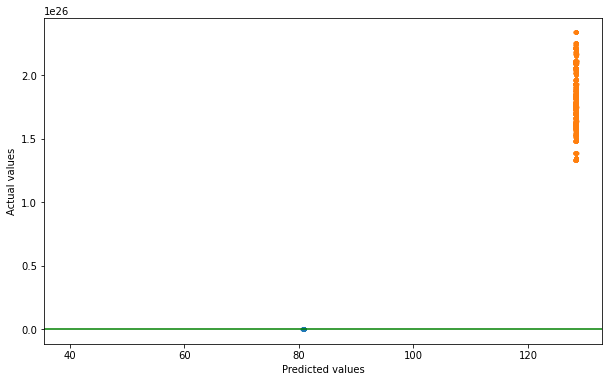

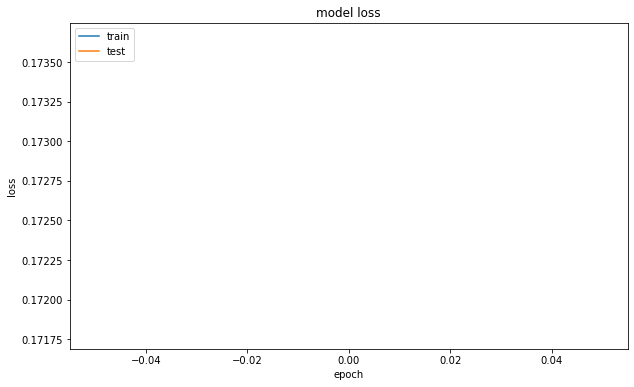

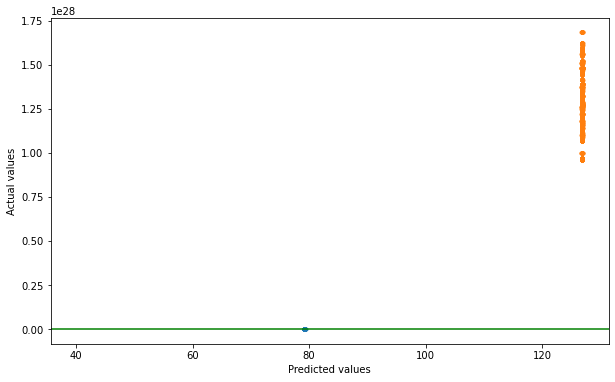

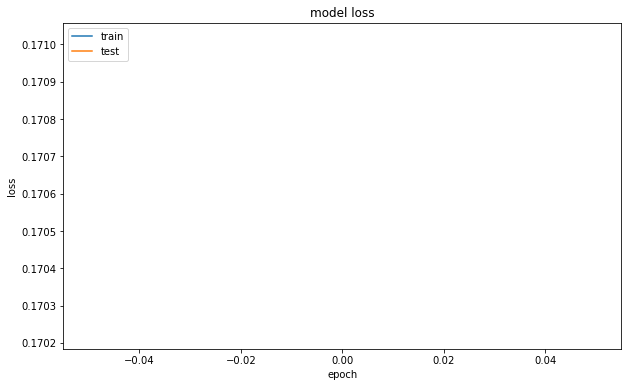

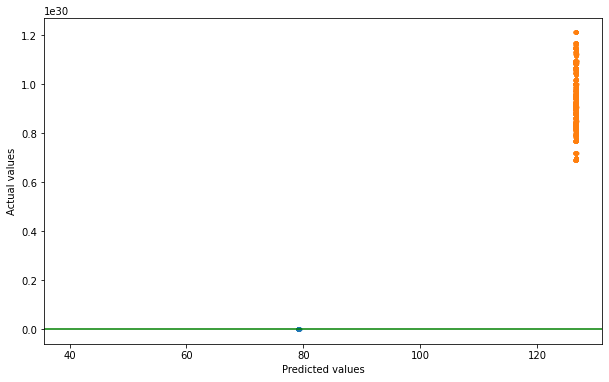

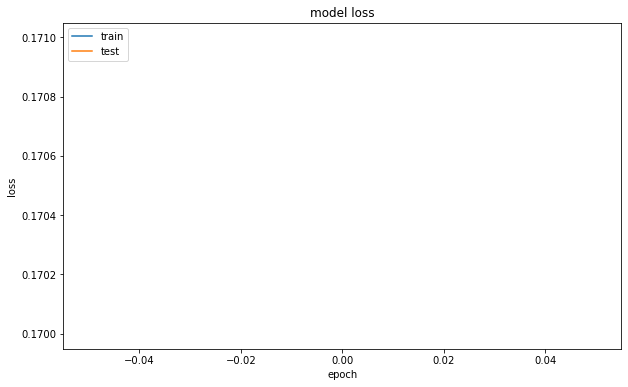

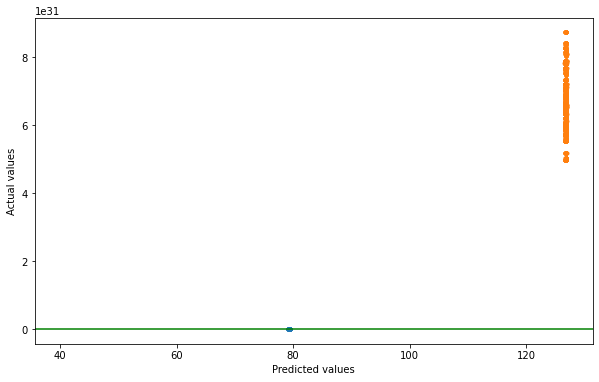

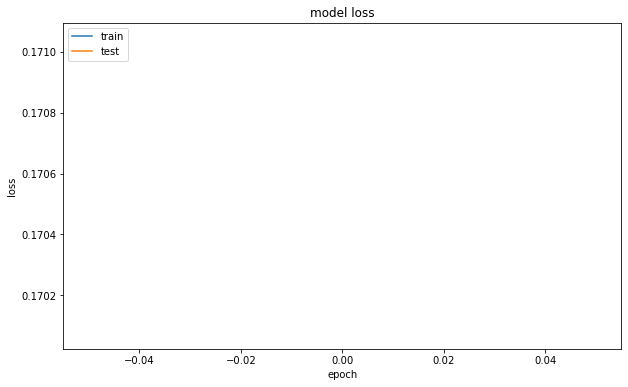

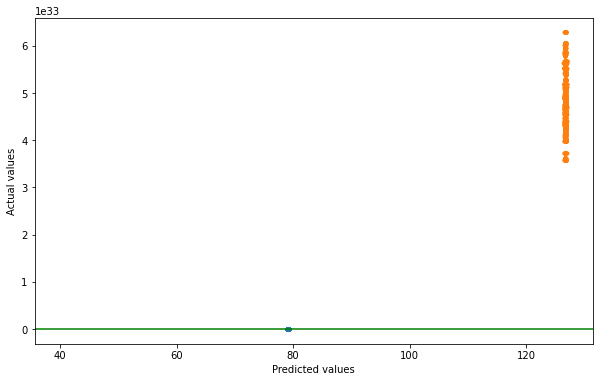

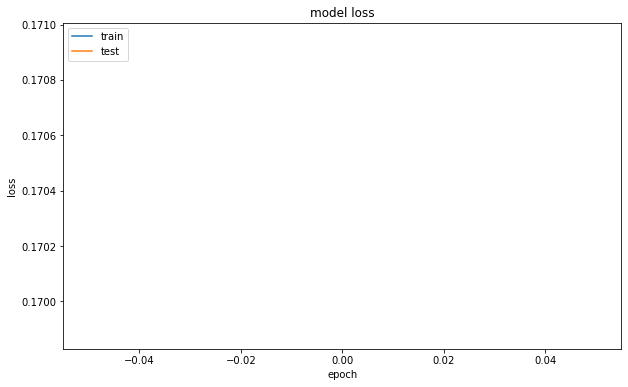

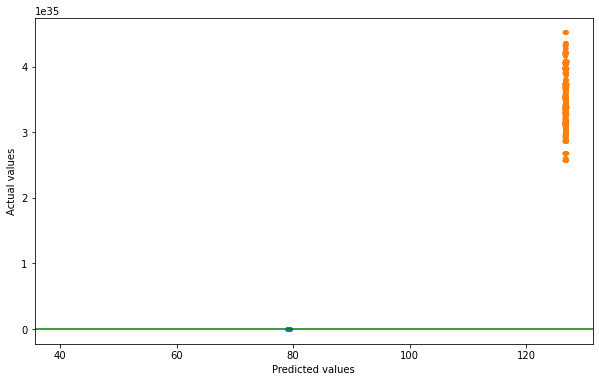

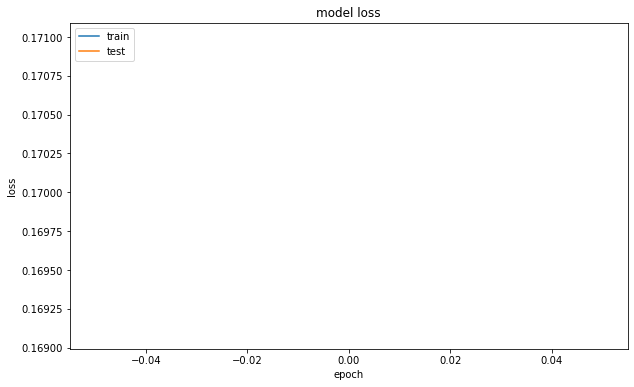

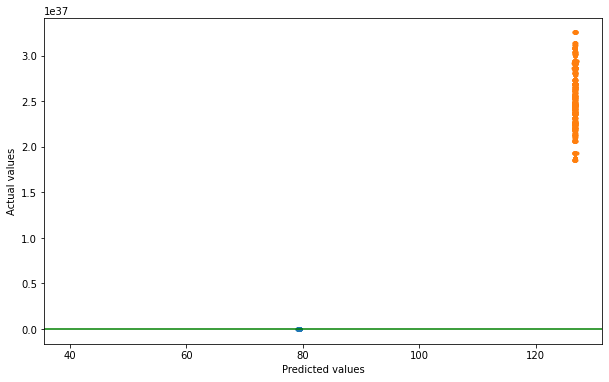

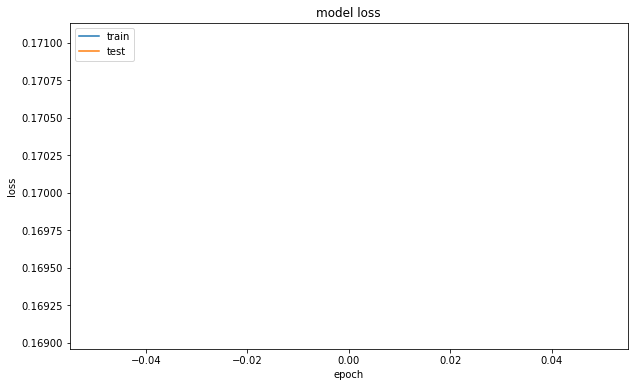

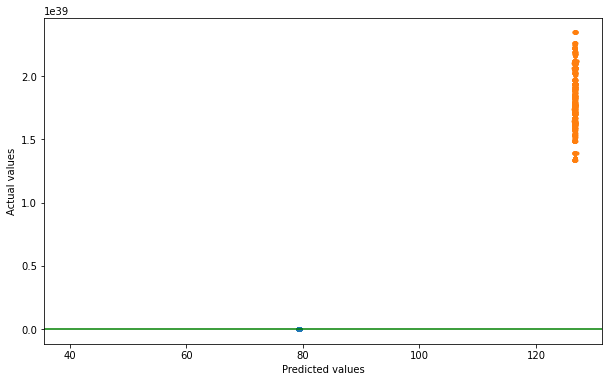

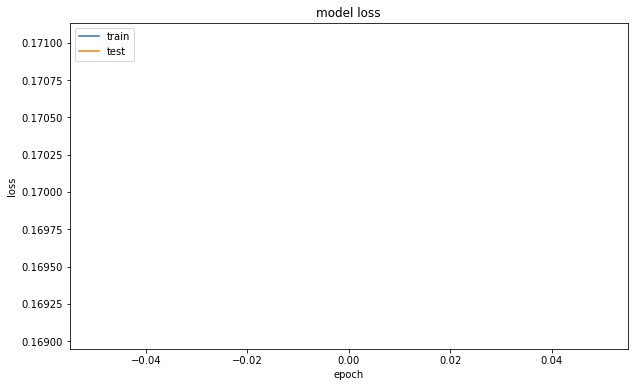

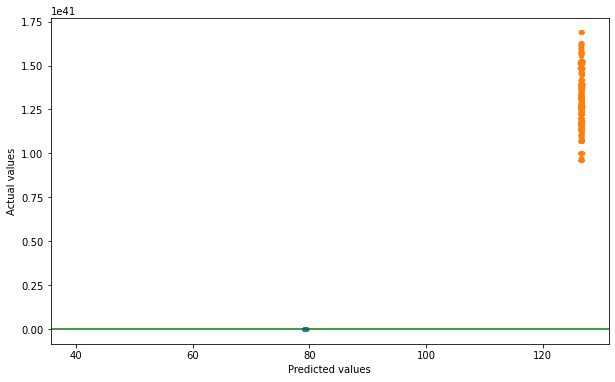

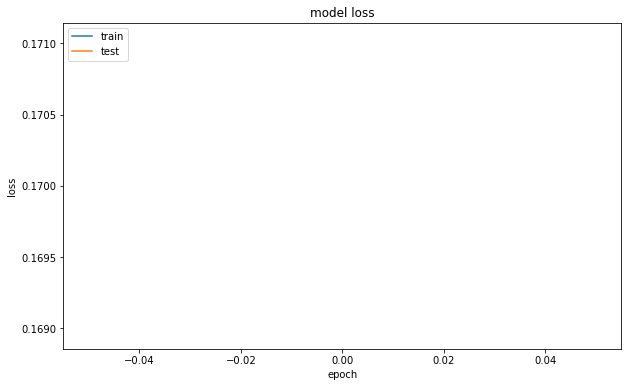

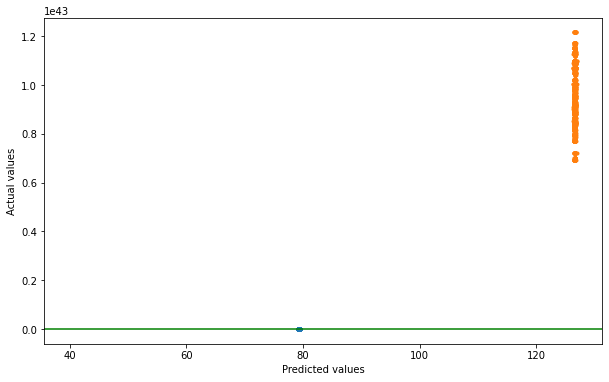

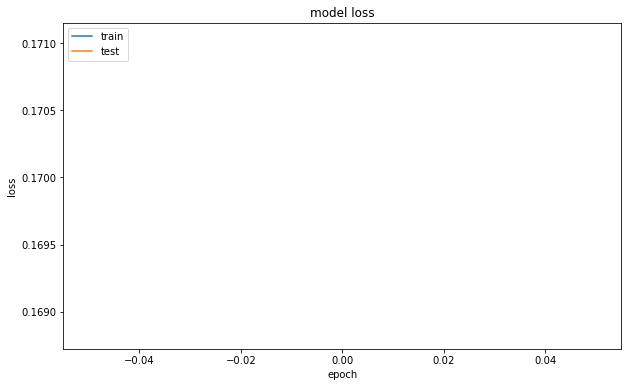

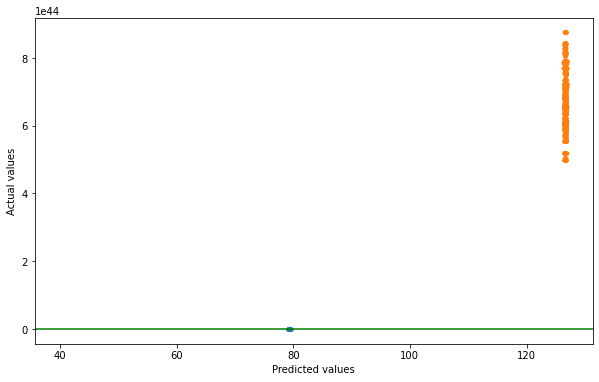

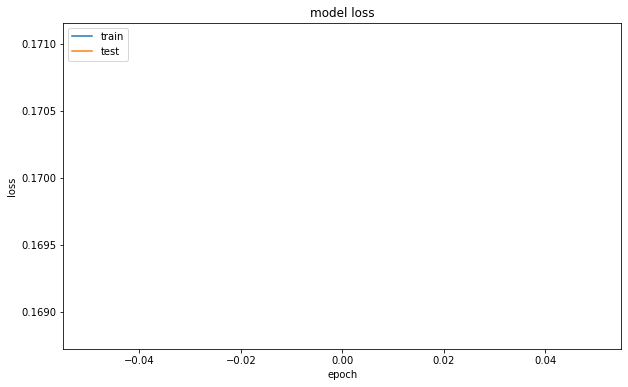

In [6]:

lr_list = [5e-3 ,5e-4 ,5e-5]
loss_list = ['mse' , 'mae']

for loss in loss_list:
    for lr in lr_list:
        optimizer_list = [RMSprop(learning_rate=lr) ,Adam(learning_rate=lr) ,SGD(learning_rate=lr) ,Adagrad(learning_rate=lr)]
        for optimizer in optimizer_list:

                model.compile(loss=loss, optimizer=optimizer, metrics=['mse','mae'])
                history = model.fit(X_train, y_train, validation_split=0.2, epochs=NUM_EPOCH )

                optimizer_name = optimizer.get_config()['name']
                
                result_name = f'{model_name}_lr:{lr}_NUM_EPOCH:{NUM_EPOCH}_optimizer:{optimizer_name}_loss:{loss}'
                folder_path = f'./optimization_results/{result_name}'
                os.makedirs(folder_path)
                
                history_dict = history.history
                with open(f'{folder_path}/history.json', 'w') as f:
                    json.dump(history_dict, f)

                results = model.evaluate(X_test, y_test)
                save_model(model, f"{folder_path}/model.h5")

                
                y_predicted = model.predict(X_test)
                
                y_predicted_df = scaler.inverse_transform(y_predicted)
                y_test = scaler.inverse_transform(y_test)
                y_predicted_df = pd.DataFrame(y_predicted_df)
                y_test = pd.DataFrame(y_test)
                
                plot_scatter(y_predicted_df,y_test ,folder_path)
                
                mae_dbp ,mae_sbp ,mse_dbp ,mse_sbp = calculate_loss(y_predicted_df,y_test)
                
                plot_loss(history_dict ,folder_path)
                
                out_dict = {
                        'model_name':[model_name],
                        'lr':[lr],
                        'epochs':[NUM_EPOCH],
                        'optimizer':[optimizer_name],
                        'loss':[loss],
                        'results':[results],
                        'mae_dbp':[mae_dbp],
                        'mae_sbp':[mae_sbp],
                        'mse_dbp':[mse_dbp],
                        'mse_sbp':[mse_sbp],
                    
                        }

                save_data(out_dict, 'sheets/model_optimizing.csv')